In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np

from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve

from sklearn.metrics  import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.datasets import make_regression

from sklearn.cross_decomposition import PLSRegression

from sklearn.dummy import DummyRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#rom sklearn.ensemble import RandomTreesEmbedding

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.isotonic import IsotonicRegression

from sklearn.kernel_ridge import KernelRidge

from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor


In [2]:
# Формируем данные исходных dataset

X, Y = make_regression(n_samples = 100, n_features=100, n_informative=5, random_state=1)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

df = pd.DataFrame()

LIST_NAME_FEATURES = []
LIST_NAME_Y = []

# Фичи
for index, name in enumerate(X.columns):
    LIST_NAME_FEATURES.append(f"X{index}")
    df[f"X{index}"] = X[index]
    
# Y
for index, name in enumerate(Y.columns):
    LIST_NAME_Y.append(f"Y")
    df[f"Y"] = Y[index]

# Убираем nan
df.dropna()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,Y
0,-0.644887,-0.838461,-0.541017,-0.206648,1.077663,0.596810,1.153668,-0.650632,0.891848,0.951259,...,-0.447763,0.742208,1.006131,1.256626,0.267859,0.428748,-0.123292,1.618648,-1.924411,-22.754639
1,0.632308,0.682364,0.326717,-0.319301,-1.271478,-0.526292,-0.213767,0.472607,-0.948157,-0.460615,...,0.927940,1.726629,-1.013680,0.658450,0.591374,-1.037313,2.038828,-1.740729,-0.498542,224.417071
2,0.661249,0.749986,0.783604,0.330767,0.293766,0.341772,-0.284628,0.956176,-0.285018,-0.315171,...,0.111296,0.141157,-0.860615,-1.078683,0.104910,1.973838,-1.676265,-0.429156,0.338231,23.856344
3,0.403724,-0.335054,0.579087,-0.571980,-0.751977,-0.788276,0.793930,-0.309679,-0.114218,-0.232603,...,-0.324332,1.053042,-0.851262,-0.667930,0.420755,-2.160269,-0.674017,1.472002,0.380672,109.627237
4,0.485241,0.324000,-1.005675,-0.605008,0.119690,0.022500,-0.939901,1.734745,0.647245,0.830049,...,0.258716,1.666226,1.420689,0.992014,0.091870,2.226810,0.791382,-0.153370,0.436515,112.931349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.148490,1.693809,-1.565738,1.760415,0.107343,-0.177632,-1.787913,0.382715,-1.637450,0.169869,...,-0.353410,0.142251,1.384991,-0.870008,-0.799547,-0.731531,-0.806185,0.557439,0.196870,-234.191484
96,-0.949864,-0.621252,0.505054,0.814625,-0.924541,-0.429386,-0.261202,0.046846,0.858011,0.459782,...,0.177946,-0.701649,-1.086301,1.127751,-1.279426,-0.130195,-0.185811,0.327068,1.050615,-155.852594
97,0.219249,0.442575,0.092104,0.314288,0.437772,0.055054,-1.275508,1.305157,-0.942368,1.101025,...,-1.432141,-0.796727,0.125273,0.424846,1.225526,0.493698,-0.500715,0.147472,-1.786110,259.366468
98,2.017390,0.094415,0.307489,0.587450,0.699589,-0.161504,1.883030,0.525360,0.785062,-1.835899,...,-0.628799,-0.441302,-1.301066,-1.337402,-0.659326,0.042317,0.121978,0.331694,-1.456690,-91.824344


In [3]:
df.corr()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,Y
X0,1.000000,-0.010014,0.092172,0.011947,0.151448,-0.195936,-0.048167,0.175704,-0.008126,-0.103832,...,0.045154,-0.034100,-0.134661,0.031930,-0.040693,-0.035144,-0.023335,-0.073500,0.005303,-0.104887
X1,-0.010014,1.000000,-0.062210,0.018935,-0.027149,-0.009473,0.042440,0.056946,-0.059718,0.062481,...,0.069194,-0.002691,0.152360,-0.042473,0.023381,0.046189,0.045317,-0.112236,-0.062296,-0.053069
X2,0.092172,-0.062210,1.000000,-0.071154,-0.115315,-0.072149,0.168184,-0.039881,-0.013415,-0.224493,...,0.229958,-0.167620,-0.234668,0.006538,0.026246,-0.070603,0.048558,-0.105144,0.141599,0.056904
X3,0.011947,0.018935,-0.071154,1.000000,0.152766,-0.075146,-0.042260,0.010289,0.116488,0.018236,...,-0.080681,0.023015,-0.078256,-0.032208,-0.134195,-0.082318,-0.126365,-0.047258,0.016019,-0.154389
X4,0.151448,-0.027149,-0.115315,0.152766,1.000000,-0.025085,0.132409,0.041355,-0.023041,0.117096,...,0.116022,-0.189538,0.052951,-0.046279,-0.171893,-0.033547,-0.100234,-0.050803,-0.048351,-0.179577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X96,-0.035144,0.046189,-0.070603,-0.082318,-0.033547,0.087868,-0.102328,0.150068,0.012029,0.070752,...,-0.152843,0.089077,0.121705,0.032961,-0.083148,1.000000,-0.038404,-0.083822,0.171704,0.061191
X97,-0.023335,0.045317,0.048558,-0.126365,-0.100234,0.142227,-0.067921,-0.077798,-0.039944,0.036435,...,0.182051,0.150968,0.093849,0.077555,0.077281,-0.038404,1.000000,0.032429,-0.017986,-0.066397
X98,-0.073500,-0.112236,-0.105144,-0.047258,-0.050803,0.145612,-0.014938,-0.083404,0.143018,0.116797,...,-0.093546,0.176527,-0.178782,0.062818,-0.066062,-0.083822,0.032429,1.000000,0.061622,-0.194194
X99,0.005303,-0.062296,0.141599,0.016019,-0.048351,-0.100233,-0.066822,-0.145136,-0.069258,0.077879,...,0.158555,0.039558,0.068627,0.016889,0.010349,0.171704,-0.017986,0.061622,1.000000,-0.079138


In [4]:
# Функция для проверки на корреляцию
def valid_corr(df, max_corr=0.8):
    
    # Матрица корреляции элментов
    matrix_corr = df.corr()

    # Список для хранения параметров, которые буде удалять
    corr_list = []

    # Добавим в наш список все элеементы корреляция коорых между собой нас не устраивет
    for i in range(1, len(matrix_corr)):
        for j in range(i + 1, len(matrix_corr) - 1):
            #print(f'{f"X{i}"} - {f"X{j}"} >>> {abs(matrix_corr[f"X{i}"][f"X{j}"])}')
            # Если значение корреляции больше, чем допуспимое значение
            if abs(matrix_corr[f"X{i}"][f"X{j}"]) > max_corr:
                
                # Смотрим какой из параметров меньше коррелирует с 'y' и добавляем его в список для дальнейшего удаления
                if matrix_corr[f"X{i}"]["Y"] > matrix_corr[f"X{j}"]["Y"]:
                    corr_list.append(f"X{j}")
                else:
                    corr_list.append(f"X{i}")

#    # Проверим значения, которые никак не коррелируют с 'y'
#    for i in range(1, len(matrix_corr["Y"])):
#        if isnan(matrix_corr["Y"][f"X{i}"]) ==  True: corr_list.append(f"X{i}" + str(i))

    corr_list = list(set(corr_list)) 
    print (corr_list)
    temp = df.drop (corr_list, axis = 1)
    return (temp)
valid_corr(df, max_corr=0.8)

[]


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,Y
0,-0.644887,-0.838461,-0.541017,-0.206648,1.077663,0.596810,1.153668,-0.650632,0.891848,0.951259,...,-0.447763,0.742208,1.006131,1.256626,0.267859,0.428748,-0.123292,1.618648,-1.924411,-22.754639
1,0.632308,0.682364,0.326717,-0.319301,-1.271478,-0.526292,-0.213767,0.472607,-0.948157,-0.460615,...,0.927940,1.726629,-1.013680,0.658450,0.591374,-1.037313,2.038828,-1.740729,-0.498542,224.417071
2,0.661249,0.749986,0.783604,0.330767,0.293766,0.341772,-0.284628,0.956176,-0.285018,-0.315171,...,0.111296,0.141157,-0.860615,-1.078683,0.104910,1.973838,-1.676265,-0.429156,0.338231,23.856344
3,0.403724,-0.335054,0.579087,-0.571980,-0.751977,-0.788276,0.793930,-0.309679,-0.114218,-0.232603,...,-0.324332,1.053042,-0.851262,-0.667930,0.420755,-2.160269,-0.674017,1.472002,0.380672,109.627237
4,0.485241,0.324000,-1.005675,-0.605008,0.119690,0.022500,-0.939901,1.734745,0.647245,0.830049,...,0.258716,1.666226,1.420689,0.992014,0.091870,2.226810,0.791382,-0.153370,0.436515,112.931349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.148490,1.693809,-1.565738,1.760415,0.107343,-0.177632,-1.787913,0.382715,-1.637450,0.169869,...,-0.353410,0.142251,1.384991,-0.870008,-0.799547,-0.731531,-0.806185,0.557439,0.196870,-234.191484
96,-0.949864,-0.621252,0.505054,0.814625,-0.924541,-0.429386,-0.261202,0.046846,0.858011,0.459782,...,0.177946,-0.701649,-1.086301,1.127751,-1.279426,-0.130195,-0.185811,0.327068,1.050615,-155.852594
97,0.219249,0.442575,0.092104,0.314288,0.437772,0.055054,-1.275508,1.305157,-0.942368,1.101025,...,-1.432141,-0.796727,0.125273,0.424846,1.225526,0.493698,-0.500715,0.147472,-1.786110,259.366468
98,2.017390,0.094415,0.307489,0.587450,0.699589,-0.161504,1.883030,0.525360,0.785062,-1.835899,...,-0.628799,-0.441302,-1.301066,-1.337402,-0.659326,0.042317,0.121978,0.331694,-1.456690,-91.824344


In [5]:

X = df[LIST_NAME_FEATURES]
Y = df[LIST_NAME_Y]

#X = pd.DataFrame(X)
# X = pd.DataFrame(Normalizer().fit(X).transform(X))

# Нормализация
# X = pd.DataFrame(Normalizer().fit(X).transform(X))

# Стандартизация
#X = pd.DataFrame(StandardScaler().fit(X).transform(X))

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      100 non-null    float64
 1   X1      100 non-null    float64
 2   X2      100 non-null    float64
 3   X3      100 non-null    float64
 4   X4      100 non-null    float64
 5   X5      100 non-null    float64
 6   X6      100 non-null    float64
 7   X7      100 non-null    float64
 8   X8      100 non-null    float64
 9   X9      100 non-null    float64
 10  X10     100 non-null    float64
 11  X11     100 non-null    float64
 12  X12     100 non-null    float64
 13  X13     100 non-null    float64
 14  X14     100 non-null    float64
 15  X15     100 non-null    float64
 16  X16     100 non-null    float64
 17  X17     100 non-null    float64
 18  X18     100 non-null    float64
 19  X19     100 non-null    float64
 20  X20     100 non-null    float64
 21  X21     100 non-null    float64
 22  X2

In [7]:
print (len(X), '<->', len(Y))

100 <-> 100


In [8]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,Y
0,-0.644887,-0.838461,-0.541017,-0.206648,1.077663,0.596810,1.153668,-0.650632,0.891848,0.951259,...,-0.447763,0.742208,1.006131,1.256626,0.267859,0.428748,-0.123292,1.618648,-1.924411,-22.754639
1,0.632308,0.682364,0.326717,-0.319301,-1.271478,-0.526292,-0.213767,0.472607,-0.948157,-0.460615,...,0.927940,1.726629,-1.013680,0.658450,0.591374,-1.037313,2.038828,-1.740729,-0.498542,224.417071
2,0.661249,0.749986,0.783604,0.330767,0.293766,0.341772,-0.284628,0.956176,-0.285018,-0.315171,...,0.111296,0.141157,-0.860615,-1.078683,0.104910,1.973838,-1.676265,-0.429156,0.338231,23.856344
3,0.403724,-0.335054,0.579087,-0.571980,-0.751977,-0.788276,0.793930,-0.309679,-0.114218,-0.232603,...,-0.324332,1.053042,-0.851262,-0.667930,0.420755,-2.160269,-0.674017,1.472002,0.380672,109.627237
4,0.485241,0.324000,-1.005675,-0.605008,0.119690,0.022500,-0.939901,1.734745,0.647245,0.830049,...,0.258716,1.666226,1.420689,0.992014,0.091870,2.226810,0.791382,-0.153370,0.436515,112.931349


In [9]:
df.tail()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,Y
95,-0.148490,1.693809,-1.565738,1.760415,0.107343,-0.177632,-1.787913,0.382715,-1.637450,0.169869,...,-0.353410,0.142251,1.384991,-0.870008,-0.799547,-0.731531,-0.806185,0.557439,0.196870,-234.191484
96,-0.949864,-0.621252,0.505054,0.814625,-0.924541,-0.429386,-0.261202,0.046846,0.858011,0.459782,...,0.177946,-0.701649,-1.086301,1.127751,-1.279426,-0.130195,-0.185811,0.327068,1.050615,-155.852594
97,0.219249,0.442575,0.092104,0.314288,0.437772,0.055054,-1.275508,1.305157,-0.942368,1.101025,...,-1.432141,-0.796727,0.125273,0.424846,1.225526,0.493698,-0.500715,0.147472,-1.786110,259.366468
98,2.017390,0.094415,0.307489,0.587450,0.699589,-0.161504,1.883030,0.525360,0.785062,-1.835899,...,-0.628799,-0.441302,-1.301066,-1.337402,-0.659326,0.042317,0.121978,0.331694,-1.456690,-91.824344
99,-0.172222,-0.353857,-1.042769,-0.005777,1.832996,-0.341348,1.428931,-0.823251,-1.411615,0.333570,...,-1.060633,-0.827209,-1.258697,-1.192660,-0.032599,-1.668723,0.115748,0.732320,-0.009382,-85.688192


In [10]:
def get_data(X, Y, size_, random_state_):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size_, random_state=random_state_) 
    return X_train, X_test, y_train, y_test

In [11]:
#X_train.head()

In [12]:
# Модели

MODELS = {
    'PLSRegression': PLSRegression(),
    
    'DummyRegressor': DummyRegressor(),
    
    'AdaBoostRegressor': AdaBoostRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    
    #'GaussianProcessRegressor': GaussianProcessRegressor(),
    
    'KernelRidge': KernelRidge(),
    
    
    'ARDRegression': ARDRegression(),
    'BayesianRidge': BayesianRidge(),
    'ElasticNet': ElasticNet(),
    'HuberRegressor': HuberRegressor(),
    'Lars':  Lars(),
    'LarsCV': LarsCV(),
    'LassoLars': LassoLars(),
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionCV': LogisticRegressionCV(),
    'PassiveAggressiveRegressor': PassiveAggressiveRegressor(),
    'RANSACRegressor': RANSACRegressor(),
    'RidgeCV': RidgeCV(),
    'SGDRegressor': SGDRegressor()
}

In [13]:
prediction_list = []

# Здесь будем хранить результаты
TestModels = DataFrame()
tmp = {}

X_train, X_test, y_train, y_test = get_data(X, Y, 0.30, 0)
#for name, clf in zip(names, classifiers):
for model_name in MODELS.keys():
    try:
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        model = MODELS[model_name]
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)

        prediction = model.predict(X_test)

        r2_score_ = r2_score(prediction, y_test)
        
        print(f"{model_name}: {r2_score_}")
        if abs(r2_score_) < 2:
            tmp['Model'] = model_name
            tmp['R2_Y'] =  r2_score_
            # tmp['ACCU'] =  accuracy_score(y_test, prediction)
            TestModels = TestModels.append([tmp])
            # try:
            #     fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
            #     tmp['fpr'] = fpr
            #     tmp['tpr'] = tpr
            #     tmp['thresholds'] = thresholds
            # except:
            #     print ('error roc')
            # Записываем данные и итоговый DataFrame


    except Exception as e:
        print (f"{name}error: {e}")
    
    
TestModels.set_index('Model', inplace=True)    
# print_list(prediction_list)
[print(item) for item in prediction_list]

PLSRegression: 0.3371336917259041
DummyRegressor: -7.973756620485886e+34
AdaBoostRegressor: -0.03259866790876864
BaggingRegressor: 0.565425114320976


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


ExtraTreesRegressor: 0.530064140227033
GradientBoostingRegressor: 0.6408236617851418


D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestRegressor: 0.3166045195537963
KernelRidge: 0.8013980354437449
ARDRegression: 0.9934153586525264
BayesianRidge: 0.7978791902355694
ElasticNet: 0.2857702743930791
HuberRegressor: 0.8095754192024661
Lars: 1.0
LarsCV: 1.0
LassoLars: 0.9747042253430748
LinearRegression: 0.7998265776219895
0error: Unknown label type: 'continuous'
0error: Unknown label type: 'continuous'
PassiveAggressiveRegressor: 0.81167282549925
0error: `min_samples` may not be larger than number of samples: n_samples = 70.
RidgeCV: 0.7790048344018895
SGDRegressor: 0.8087042104503828


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[]

In [14]:
TestModels.sort_values(by=['R2_Y']).head(-1)

,R2_Y
Model,
AdaBoostRegressor,-0.032599
ElasticNet,0.285770
RandomForestRegressor,0.316605
PLSRegression,0.337134
ExtraTreesRegressor,0.530064
BaggingRegressor,0.565425
GradientBoostingRegressor,0.640824
RidgeCV,0.779005
BayesianRidge,0.797879


In [15]:
# Найти максимальное значение

# ??? 
name_beast_model = ''
for index, row in TestModels.iterrows():
    if row['R2_Y'] == TestModels['R2_Y'].values.max():
        name_beast_model = index
#print ('R^2:', TestModels['R2_Y'].values.max())
print ('Точность:', TestModels['R2_Y'].values.max())
print ('Лучшая модель:', name_beast_model)

Точность: 1.0
Лучшая модель: LarsCV


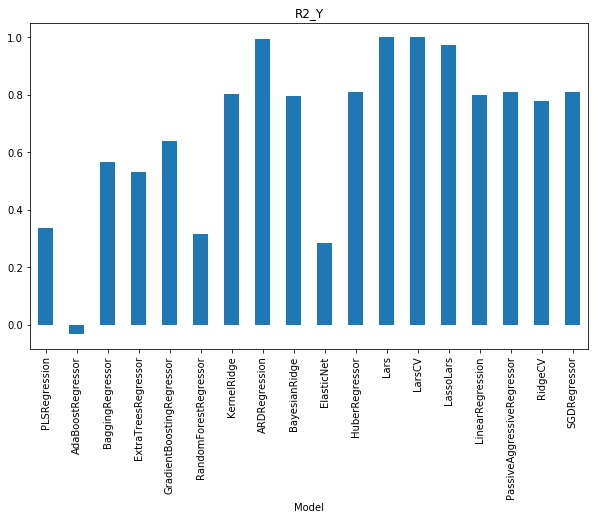

In [16]:
from pylab import *
TestModels.R2_Y.plot(figsize=(10,6), kind='bar', title='R2_Y')

In [17]:
# (DataFrame, Колонка для сортировки, число моделей для извлечения)
def get_beast_model(models_df, col, reange_model=1, accuracy=None):
    if accuracy:
        res_list = []
        sort_models_df = models_df.sort_values(by=[col])
        for index, row in sort_models_df.iterrows():
            if row[col] >= accuracy:
                res_list.append(index)
        return res_list
    else:
        temp = models_df.sort_values(by=[col])[-(reange_model):]
        #print (temp.head(len(classifiers)))
        result_list = []
        for index, row in temp.iterrows():
            result_list.append(index)
        return result_list

In [18]:
accuracy = 0.90
# Получить наименование всех моделей, точность которых выше 95%
beast_models_name = get_beast_model(TestModels, 'R2_Y', accuracy=accuracy)
print(f"Модели точность которых выше {accuracy * 100} %")
for name_ in beast_models_name:
    prediction = MODELS[name_].predict(X_test)
    r2_score_ = r2_score(prediction, y_test)
    print(f"Name model >>> {name_}:{r2_score_}")

Модели точность которых выше 90.0 %
Name model >>> LassoLars:0.9747042253430748
Name model >>> ARDRegression:0.9934153586525264
Name model >>> Lars:1.0
Name model >>> LarsCV:1.0


In [19]:
reange_model = 5
# Получить наименование 5-ти лучших моделей
beast_models_name = get_beast_model(TestModels, 'R2_Y', reange_model=reange_model)
print(f"5 лучшых моделей")
for name_ in beast_models_name:
    prediction = MODELS[name_].predict(X_test)
    r2_score_ = r2_score(prediction, y_test)
    print(f"name beast model >>> {name_}:{r2_score_}")

5 лучшых моделей
name beast model >>> PassiveAggressiveRegressor:0.81167282549925
name beast model >>> LassoLars:0.9747042253430748
name beast model >>> ARDRegression:0.9934153586525264
name beast model >>> Lars:1.0
name beast model >>> LarsCV:1.0


In [20]:
# Формируем список предсказаний по каждой модели
predict_list = []
for model_name in beast_models_name:
    prediction = MODELS[model_name].predict(X_test)
    predict_list.append(prediction)

In [21]:
# Методом мажоритарного голосования рассчитываем результирующее предсказание
res_prediction = []
# redict_list)
for i in range(len(predict_list[0])):
    prediction = 0
    for j in range(len(predict_list)):
        prediction += predict_list[j][i]
    predict = prediction / len(predict_list)
    res_prediction.append(predict)
    
res_prediction = np.array(res_prediction)
print(f"Точность: {r2_score(res_prediction, y_test)}")

Точность: 0.9883607497134825
